##Gopaal
##AM.EN.U4CSE19364

## Problem Definition

**Credit default risk** is the risk that a lender takes the chance that a borrower fails to make required payments of the loan.

## Dataset

The training dataset used is from kaggle which is being used to train the models used in this project.

https://www.kaggle.com/laotse/credit-risk-dataset

##Python packages


**Numpy**

NumPy, which stands for Numerical Python, is a library consisting of multidimensional array objects and a collection of routines for processing those arrays. Using NumPy, mathematical and logical operations on arrays can be performed.

---



**Pandas**

Pandas is a fast, powerful, flexible and easy to use open source data analysis and manipulation tool,
built on top of the Python programming language.


---



**Matplotlib**

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. It provides an object-oriented API for embedding plots into applications using general-purpose GUI toolkits like wxPython, Qt, Tkinter.



---


**Seaborn**

Seaborn is a Python data visualization library based on matplotlib. Gives more attractive graphs than matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.


---


**Scikit-Learn**

Scikit-Learn (Sklearn) is the most useful and robust library for machine learning in Python. It provides a selection of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction via a consistence interface in Python.This library, which is largely written in Python, is built upon NumPy, SciPy and Matplotlib.


---



## Data Loading <a class='anchor' id='Section_2'>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from matplotlib import style 
style.use("ggplot")
import os
import sys
%matplotlib inline
import warnings 
warnings.filterwarnings('ignore')


In [2]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score 
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import model_selection
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.datasets import make_classification
from sklearn.model_selection import KFold

In [3]:
# read data into a DataFrame
credit_df = pd.read_csv("credit_risk_dataset.csv")

In [4]:
# check the data size
credit_df.shape

(32581, 12)

In [5]:
Nan_per = credit_df.isnull().sum()/credit_df.shape[0]*100
Nan_per.round(2)

person_age                    0.00
person_income                 0.00
person_home_ownership         0.00
person_emp_length             2.75
loan_intent                   0.00
loan_grade                    0.00
loan_amnt                     0.00
loan_int_rate                 9.56
loan_status                   0.00
loan_percent_income           0.00
cb_person_default_on_file     0.00
cb_person_cred_hist_length    0.00
dtype: float64

In [6]:
# check the mode, median for the two features
print('person_emp_length mode {}'.format(credit_df['person_emp_length'].mode()[0]))
print('person_emp_length median {}'.format(credit_df['person_emp_length'].median()))
print('loan_int_rate mode {}'.format(credit_df['loan_int_rate'].mode()[0]))
print('loan_int_rate median {}'.format(credit_df['loan_int_rate'].median()))

person_emp_length mode 0.0
person_emp_length median 4.0
loan_int_rate mode 7.51
loan_int_rate median 10.99


In [7]:
# fill NaN with the mode
credit_df['person_emp_length'].fillna(credit_df['person_emp_length'].mode()[0], inplace=True)
credit_df['loan_int_rate'].fillna(credit_df['loan_int_rate'].median(), inplace=True)

In [8]:
# check the nans are replaced 
credit_df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [9]:
# numerical variebles
num_cols = pd.DataFrame(credit_df[credit_df.select_dtypes(include=['float', 'int']).columns])
# print the numerical variebles
num_cols.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length'],
      dtype='object')

In [10]:
# clean the dataset and drop outliers
cleaned_credit_df = credit_df[credit_df['person_age']<=100]
cleaned_credit_df = cleaned_credit_df[cleaned_credit_df['person_emp_length']<=60]
cleaned_credit_df = cleaned_credit_df[cleaned_credit_df['person_income']<=4e6]

In [11]:
# get the cleaned numberical variebles
cleaned_num_cols = pd.DataFrame(cleaned_credit_df[cleaned_credit_df.select_dtypes(include=['float', 'int']).columns])

In [12]:
# get the categorical variebles 
cat_cols = pd.DataFrame(cleaned_credit_df[cleaned_credit_df.select_dtypes(include=['object']).columns])
cat_cols.columns

Index(['person_home_ownership', 'loan_intent', 'loan_grade',
       'cb_person_default_on_file'],
      dtype='object')

##Summarization

In [13]:
# decribe the dataset
credit_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.658114,9589.371106,11.009620,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.159669,6322.086646,3.081611,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,8.490000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.110000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [14]:
encoded_cat_cols = pd.get_dummies(cat_cols)
cat_cols_corr = pd.concat([encoded_cat_cols, cleaned_credit_df['loan_status']], axis=1)
corr = cat_cols_corr.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True


In [15]:
# concat the numerical and one-hot encoded categorical variebles
cleaned_credit_df = pd.concat([cleaned_num_cols, encoded_cat_cols], axis=1)
cleaned_credit_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
1,21,9600,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
2,25,9600,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0


##Visualization

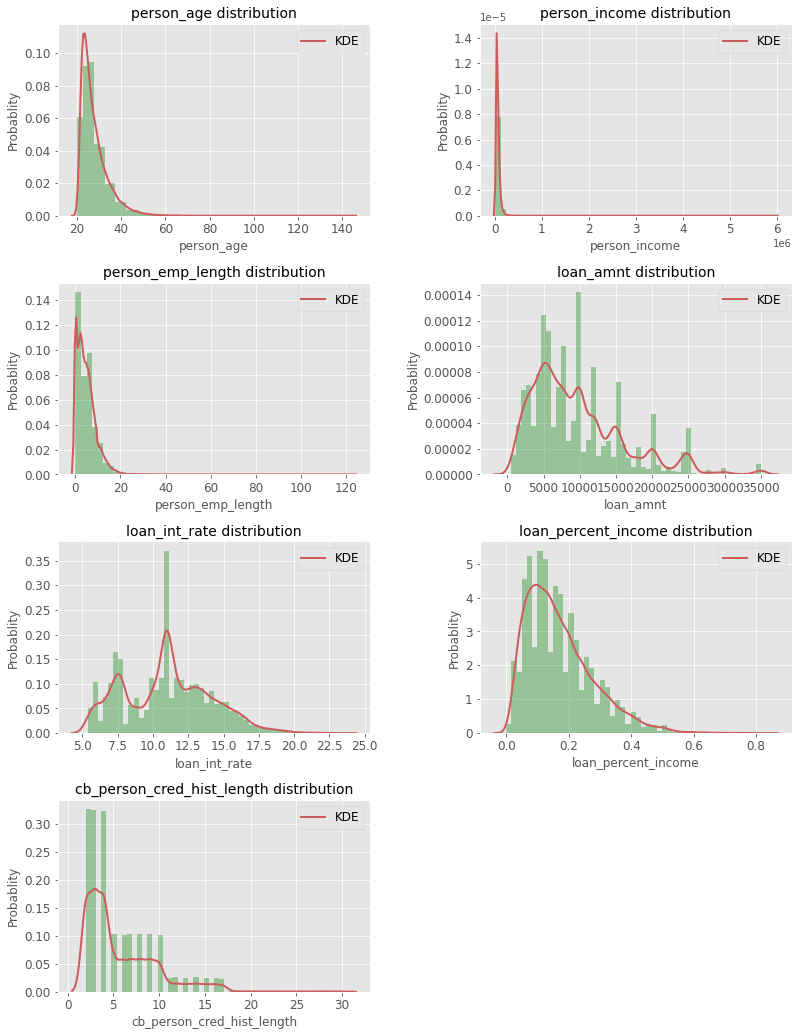

In [16]:
# drop the label column 'loan status' before visualization
num_cols_hist = num_cols.drop(['loan_status'], axis=1)
# visualize the distribution for each varieble
plt.figure(figsize=(12,16))

for i, col in enumerate(num_cols_hist.columns):
    idx = int('42'+ str(i+1))
    plt.subplot(idx)
    sns.distplot(num_cols_hist[col], color='forestgreen', 
                 kde_kws={'color': 'indianred', 'lw': 2, 'label': 'KDE'})
    plt.title(col+' distribution', fontsize=14)
    plt.ylabel('Probablity', fontsize=12)
    plt.xlabel(col, fontsize=12)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.legend(['KDE'], prop={"size":12})

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.35,
                    wspace=0.35)
plt.show()

**Observation:** All of the distributions are positive skewed.

* `person_age`: Most people are 20 to 60 years old. In the following analysis, to be more general, people age > 100 will be droped.
* `person_emp_length`: Most people have less than 40 years of employment. People with employment > 60 years will be droped.
* `person_income`: It seems that there are outliers which has to be removed (> 4 million).
* For all other variables, the distribution is more uniform across the whole range, thus they will be kept.


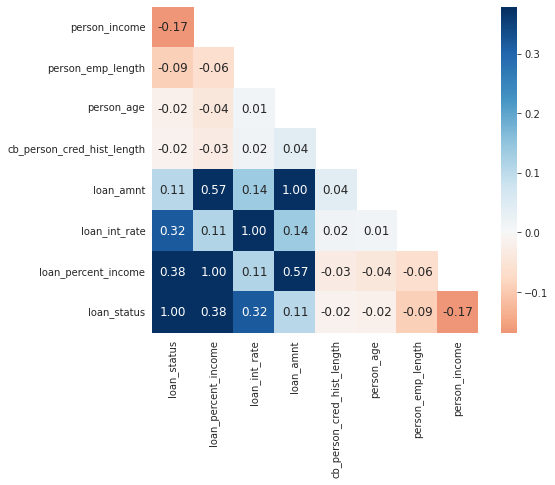

In [17]:
corr = cleaned_num_cols.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(8, 6))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(),
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 12})

**Observation:** 

* `person_income`, `person_emp_length`, and `person_age`: has negative effect on loan_status being default, which means the larger these variebles, the less likely the person is risky.
* `loan_percent_income`, `loan_int_rate`, and `loan_amnt`: has postive effect on loan_status being default, which means the larger these variebles, the more likely the person is risky.

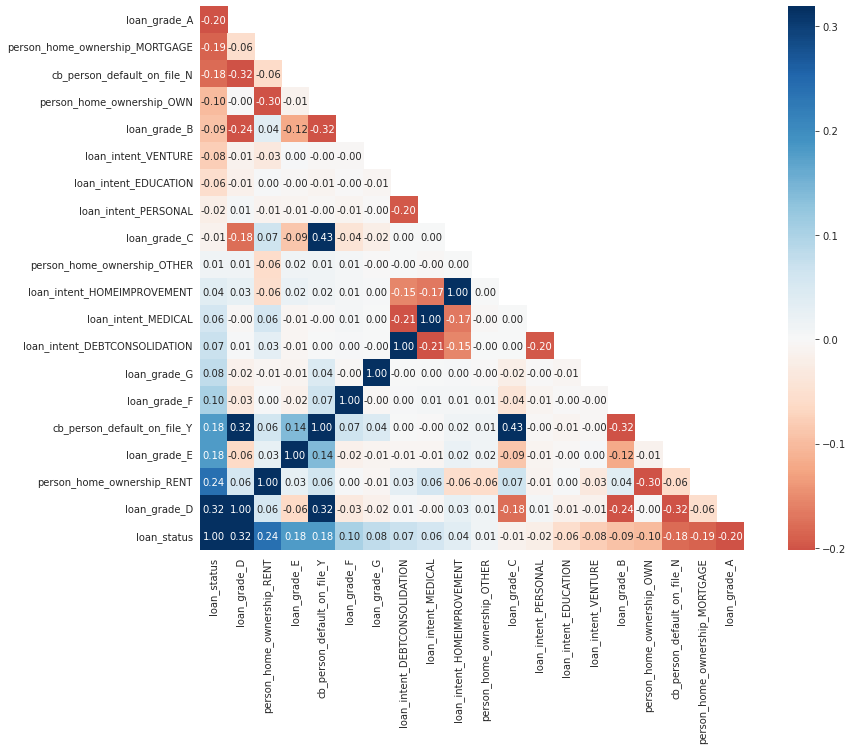

In [18]:
# one-hot encode the catogorical variebles
encoded_cat_cols = pd.get_dummies(cat_cols)
cat_cols_corr = pd.concat([encoded_cat_cols, cleaned_credit_df['loan_status']], axis=1)
corr = cat_cols_corr.corr().sort_values('loan_status', axis=1, ascending=False)
corr = corr.sort_values('loan_status', axis=0, ascending=True)
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, k=1)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(16, 10))
    ax = sns.heatmap(corr, mask=mask, vmin=corr.loan_status.min(), 
                     vmax=corr.drop(['loan_status'], axis=0).loan_status.max(), 
                     square=True, annot=True, fmt='.2f',
                     center=0, cmap='RdBu',annot_kws={"size": 10})

In [19]:
# check the cleaned dataset size 
print ('The cleaned dataset has {} rows and {} columns'.format(cleaned_credit_df.shape[0], 
                                                               cleaned_credit_df.shape[1]))
print ('The cleaned dataset has {} numerical features and {} categorical features'
       .format(len(cleaned_num_cols.columns)-1, len(encoded_cat_cols.columns)))

The cleaned dataset has 32574 rows and 27 columns
The cleaned dataset has 7 numerical features and 19 categorical features


##Data Interpretation

In [20]:
pd.read_csv("credit_risk_dataset.csv")


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


##Generation of clean CSV

In [23]:
#Generating new csv for cleaned df
cleaned_credit_df.to_csv('Cleaned.csv')

In [24]:
label = cleaned_credit_df['loan_status'] # labels
features = cleaned_credit_df.drop('loan_status',axis=1) # features
x_train, x_test, y_train, y_test = model_selection.train_test_split(features, label, 
                                                                    random_state=42, test_size=.30)
print('The train dataset has {} data\nThe test dataset has {} data'.
      format(x_train.shape[0], x_test.shape[0]))

The train dataset has 22801 data
The test dataset has 9773 data


##Algorithms Implementation

**Logistic Regression**


               precision    recall  f1-score   support

           0       0.81      0.99      0.89      7631
           1       0.74      0.15      0.25      2142

    accuracy                           0.80      9773
   macro avg       0.77      0.57      0.57      9773
weighted avg       0.79      0.80      0.75      9773

Accuracy score =  0.8022101708789522


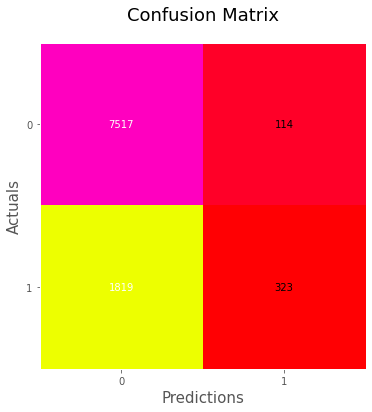

In [25]:
#Logistic Regression
lg = LogisticRegression(random_state=42)
lg.fit(x_train, y_train)
preds_lg = lg.predict(x_test)
preds_lg_proba = lg.predict_proba(x_test)
print('\n',classification_report(y_test, preds_lg))
print("Accuracy score = ",accuracy_score(y_test, preds_lg))
cm = confusion_matrix(y_test, preds_lg)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="gist_rainbow") 
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()



In [26]:
cmlr = confusion_matrix(y_test,preds_lg)
roclr =roc_auc_score(y_test, preds_lg)
acclr = accuracy_score(y_test,preds_lg)
preclr = precision_score(y_test, preds_lg)
reclr = recall_score(y_test, preds_lg)
f1lr = f1_score(y_test, preds_lg)
resultslr = pd.DataFrame([['Logistic Regression', acclr,preclr,reclr, f1lr,roclr]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

resultslr

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.80221,0.73913,0.150794,0.250485,0.567927


 **K-Nearest Neighbour**


               precision    recall  f1-score   support

           0       0.85      0.96      0.90      7631
           1       0.74      0.39      0.51      2142

    accuracy                           0.84      9773
   macro avg       0.79      0.67      0.70      9773
weighted avg       0.82      0.84      0.82      9773

Accuracy score =  0.8354650567891129


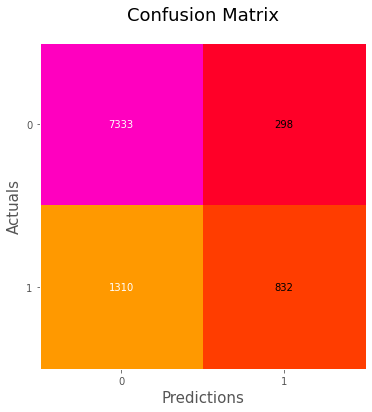

In [27]:
#KNN
knn = KNeighborsClassifier(n_neighbors=150)
knn.fit(x_train, y_train)
preds_knn = knn.predict(x_test)
preds_knn_proba = knn.predict_proba(x_test)
print('\n',classification_report(y_test, preds_knn))
print("Accuracy score = ",accuracy_score(y_test, preds_knn))
cm = confusion_matrix(y_test, preds_knn)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="gist_rainbow") 
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()
    



In [28]:
cmKNN = confusion_matrix(y_test,preds_knn)
rocKNN =roc_auc_score(y_test, preds_knn)
accKNN = accuracy_score(y_test,preds_knn)
precKNN = precision_score(y_test, preds_knn)
recKNN = recall_score(y_test, preds_knn)
f1KNN = f1_score(y_test, preds_knn)
resultsKNN = pd.DataFrame([['KNN', accKNN,precKNN,recKNN, f1KNN,rocKNN]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

resultsKNN

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,KNN,0.835465,0.736283,0.388422,0.508557,0.674685


**Decision trees**


               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7631
           1       0.96      0.73      0.83      2142

    accuracy                           0.93      9773
   macro avg       0.94      0.86      0.89      9773
weighted avg       0.93      0.93      0.93      9773

Accuracy score =  0.9329786145502916


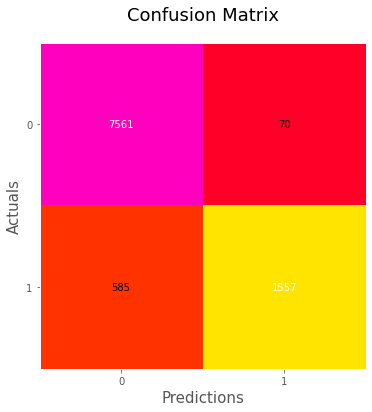

In [50]:
# Decision trees
dt = DecisionTreeClassifier(max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt.fit(x_train, y_train)
preds_dt = dt.predict(x_test)
preds_dt_proba = dt.predict_proba(x_test)
print('\n',classification_report(y_test, preds_dt))
print("Accuracy score = ",accuracy_score(y_test, preds_dt))
cm = confusion_matrix(y_test, preds_dt)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="gist_rainbow") 
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [30]:
cmdt = confusion_matrix(y_test,preds_dt)
rocdt =roc_auc_score(y_test, preds_dt)
accdt = accuracy_score(y_test,preds_dt)
precdt = precision_score(y_test, preds_dt)
recdt = recall_score(y_test, preds_dt)
f1dt = f1_score(y_test, preds_dt)
resultsdt = pd.DataFrame([['decision trees', accdt,precdt,recdt, f1dt,rocdt]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

resultsdt

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,decision trees,0.932979,0.956976,0.726891,0.826214,0.858859


**Gaussian Naive Bayes**


               precision    recall  f1-score   support

           0       0.83      0.97      0.89      7631
           1       0.71      0.27      0.39      2142

    accuracy                           0.82      9773
   macro avg       0.77      0.62      0.64      9773
weighted avg       0.80      0.82      0.78      9773

Accuracy score =  0.8159214161465261


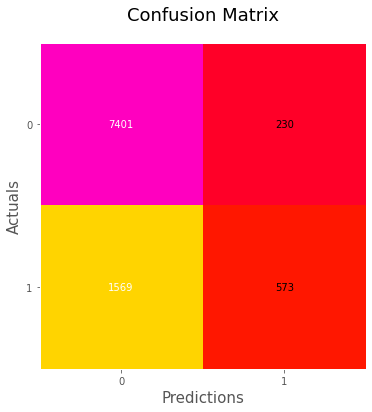

In [31]:
naive_bayes = GaussianNB() 
naive_bayes.fit(x_train,y_train) 
y_pred_nb =naive_bayes.predict(x_test)
roc=roc_auc_score(y_test, y_pred_nb)
acc = accuracy_score(y_test, y_pred_nb) 
prec = precision_score(y_test, y_pred_nb) 
rec = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)
model= pd.DataFrame([['Gaussian Naive Bayes', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
cm = confusion_matrix(y_test, y_pred_nb)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="gist_rainbow") 
print('\n',classification_report(y_test, y_pred_nb))
print("Accuracy score = ",accuracy_score(y_test, y_pred_nb))
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [32]:
cmnb = confusion_matrix(y_test,y_pred_nb)
rocnb =roc_auc_score(y_test, y_pred_nb)
accnb = accuracy_score(y_test,y_pred_nb)
precnb = precision_score(y_test, y_pred_nb)
recnb = recall_score(y_test, y_pred_nb)
f1nb = f1_score(y_test, y_pred_nb)
resultsnb = pd.DataFrame([['Naive Bayes', accnb,precnb,recnb, f1nb,rocnb]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

resultsnb

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Naive Bayes,0.815921,0.713574,0.267507,0.389134,0.618683


**Random Forest Classification**


               precision    recall  f1-score   support

           0       0.93      0.99      0.96      7631
           1       0.96      0.74      0.84      2142

    accuracy                           0.94      9773
   macro avg       0.95      0.87      0.90      9773
weighted avg       0.94      0.94      0.93      9773

Accuracy score =  0.936764555407756


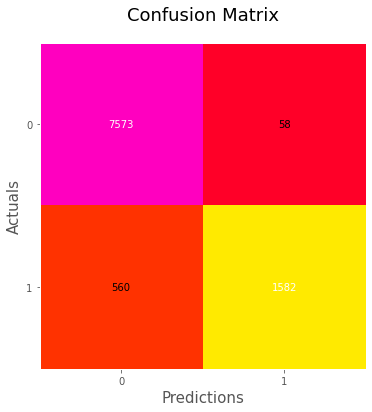

In [33]:
rf = RandomForestClassifier(n_estimators = 100,criterion = 'entropy',random_state = 0) 
rf.fit(x_train,y_train)
y_pred_rf = rf.predict(x_test)
roc=roc_auc_score(y_test, y_pred_rf)
acc = accuracy_score(y_test, y_pred_rf) 
prec = precision_score(y_test, y_pred_rf) 
rec = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
model = pd.DataFrame([['Random Forest Classifier', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])
cm = confusion_matrix(y_test, y_pred_rf)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="gist_rainbow") 
print('\n',classification_report(y_test, y_pred_rf))
print("Accuracy score = ",accuracy_score(y_test, y_pred_rf))
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()


In [34]:
cmrf = confusion_matrix(y_test,y_pred_rf)
rocrf =roc_auc_score(y_test, y_pred_rf)
accrf = accuracy_score(y_test,y_pred_rf)
precrf = precision_score(y_test, y_pred_rf)
recrf = recall_score(y_test, y_pred_rf)
f1rf = f1_score(y_test, y_pred_rf)
resultsrf = pd.DataFrame([['Random Forest', accrf,precrf,recrf, f1rf,rocrf]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

resultsrf

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Random Forest,0.936765,0.964634,0.738562,0.836594,0.865481


##User Defined Implementation (Scratch Implementation)

In [35]:
# Logistic regression User Defined
class logistic_regression:
    def __init__(self,x,y): 
        self.intercept = np.ones((x.shape[0], 1))
        self.x = np.concatenate((self.intercept, x), axis=1)
        self.weight = np.zeros(self.x.shape[1])
        self.y = y
 
    def sigmoid(self, x, weight):
        z = np.dot(x, weight)
        return 1 / (1 + np.exp(-z))
 
    def loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
 
    def gradient_descent(self, X, h, y):
        return np.dot(X.T, (h - y)) / y.shape[0]
 
    def fit(self, lr , iterations):
        for i in range(iterations):
            sigma = self.sigmoid(self.x, self.weight)
            loss = self.loss(sigma,self.y)
            dW = self.gradient_descent(self.x , sigma, self.y)
            #Updating the weights
            self.weight -= lr * dW
        return print('Working successfully')
    def predict(self, x_new , treshold):
        x_new = np.concatenate((self.intercept, x_new), axis=1)
        result = self.sigmoid(x_new, self.weight)
        result = result >= treshold
        y_pred = np.zeros(result.shape[0])
        for i in range(len(y_pred)):
            if result[i].any() == True:
                y_pred[i] = 1
            else:
                continue
 
        return y_pred

In [36]:
regressor = logistic_regression(features,label)
regressor.fit(0.1 , 5000)
pred_lr = regressor.predict(features,0.5)

Working successfully


0.7715969791858538

               precision    recall  f1-score   support

           0       0.86      0.85      0.85     25467
           1       0.48      0.50      0.49      7107

    accuracy                           0.77     32574
   macro avg       0.67      0.67      0.67     32574
weighted avg       0.78      0.77      0.77     32574

Accuracy score =  0.7715969791858538


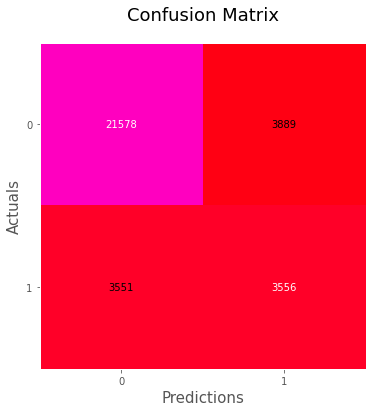

In [37]:
arr=np.asarray(label)
print(accuracy_score(arr, pred_lr))
cm = confusion_matrix(label, pred_lr)
fig, ax = plot_confusion_matrix(conf_mat=cm, figsize=(6, 6), cmap="gist_rainbow") 
print('\n',classification_report(label, pred_lr))
print("Accuracy score = ",accuracy_score(label, pred_lr))
plt.xlabel('Predictions', fontsize=15)
plt.ylabel('Actuals', fontsize=15)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [38]:
cmlg = confusion_matrix(label,pred_lr)
roclg =roc_auc_score(label, pred_lr)
acclg = accuracy_score(label,pred_lr)
preclg = precision_score(label, pred_lr)
reclg = recall_score(label, pred_lr)
f1lg = f1_score(label, pred_lr)
resultslg = pd.DataFrame([['Logistic Regression Manual', acclg,preclg,reclg, f1lg,roclg]],
 columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC_AUC'])

resultslg

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression Manual,0.771597,0.477636,0.500352,0.48873,0.673822


In [39]:
log_fpr, log_tpr, log_threshold = roc_curve(y_test, preds_lg)
dt_fpr, rfc_tpr, rfc_threshold = roc_curve(y_test, preds_dt)
knn_fpr, knn_tpr, knn_threshold = roc_curve(y_test, preds_knn)
rf_fpr, rf_tpr, rf_threshold = roc_curve(y_test, y_pred_rf)
nb_fpr, nb_tpr, nb_threshold = roc_curve(y_test, y_pred_nb)

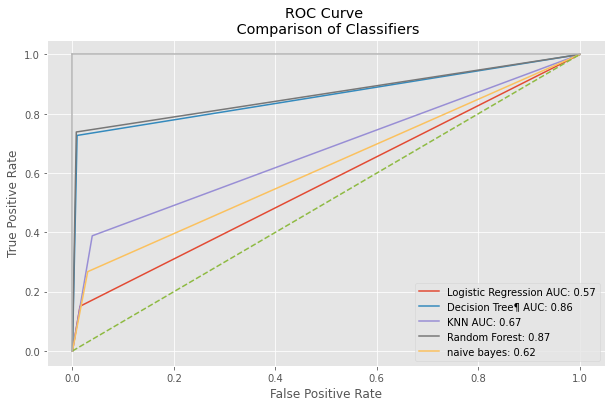

In [40]:
fig  = plt.figure(figsize=(10,6))
plt.title('ROC Curve \n Comparison of Classifiers')
plt.plot(log_fpr, log_tpr, label ='Logistic Regression AUC: {:.2f}'.format(roc_auc_score(y_test, preds_lg)))
plt.plot(dt_fpr, rfc_tpr, label ='Decision Tree¶ AUC: {:.2f}'.format(roc_auc_score(y_test, preds_dt)))
plt.plot(knn_fpr, knn_tpr, label ='KNN AUC: {:.2f}'.format(roc_auc_score(y_test, preds_knn)))
plt.plot(rf_fpr, rf_tpr, label ='Random Forest: {:.2f}'.format(roc_auc_score(y_test, y_pred_rf)))
plt.plot(nb_fpr, nb_tpr, label ='naive bayes: {:.2f}'.format(roc_auc_score(y_test, y_pred_nb)))

plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend()
plt.show()

In [ ]:
frames = [resultslr ,resultsKNN , resultsrf , resultsdt, resultslg, resultsnb] 
results = pd.concat(frames)

results

,Model,Accuracy,Precision,Recall,F1 Score,ROC_AUC
0,Logistic Regression,0.802210,0.739130,0.150794,0.250485,0.567927
0,KNN,0.835465,0.736283,0.388422,0.508557,0.674685
0,Random Forest,0.936765,0.964634,0.738562,0.836594,0.865481
0,decision trees,0.932979,0.956976,0.726891,0.826214,0.858859
0,Logistic Regression Manual,0.771597,0.477636,0.500352,0.488730,0.673822
0,Naive Bayes,0.815921,0.713574,0.267507,0.389134,0.618683


In [47]:
seed = 5
# prepare models
models = []
models.append(('LR', LogisticRegression()))  
models.append(('KNN', KNeighborsClassifier())) 
models.append(('NB', GaussianNB())) 
models.append(('CART', DecisionTreeClassifier())) 
models.append(('RFC',RandomForestClassifier())) # evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
column_names = ["Model","mean accuracy", "standard deviation accuracy"] 
df = pd.DataFrame(columns = column_names)
for name, model in models:
    results.append(cv_results)
    names.append(name)
    df_model = pd.DataFrame([[name,cv_results.mean(),cv_results.std()]],
               columns = ["Model","mean accuracy", "standard deviation accuracy"]) 
    df = df.append(df_model, ignore_index = True)
df

NameError: ignored

NameError: ignored

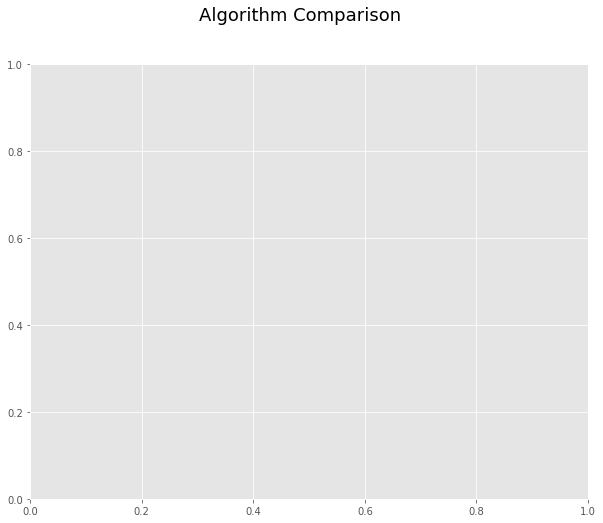

In [41]:
fig = plt.figure(figsize=(10, 8)) 
fig.suptitle('Algorithm Comparison',fontsize=18) 
ax = fig.add_subplot(111)
plt.boxplot(results)
plt.ylabel('Accuracy', fontsize=15) 
plt.xlabel('Model', fontsize=15) 
ax.set_xticklabels(names)
plt.show()

Hence, we found that Random Forest is having the best accuracy.

Accuracy of the Random Forest is 93.6% which is the best accuracy when compared to the other 4 algorithms Logistic Regression, KNN, Decision Trees, Naive Bayes.